## 1.a

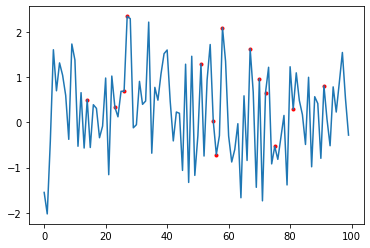

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def genwaveform(N=100, α=0.1, A=1, σ=1):
    events = np.random.binomial(1, α, size=N) * A
    noise = np.random.normal(0, σ, size=N)
    waveform = events + noise
    event_locations = np.where(events != 0)[0]
    return waveform, event_locations


waveform, event_locations = genwaveform()

plt.plot(waveform)
plt.scatter(event_locations, waveform[event_locations], c='red', marker='.')
plt.show()


## 1b

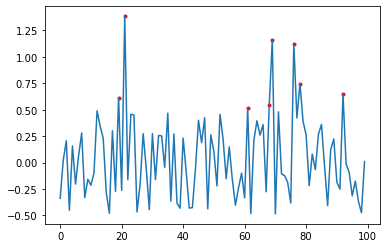

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def genwaveform(N=100, α=0.1, A=1, σ=1, noisetype='gaussian'):
    events = np.random.binomial(1, α, size=N) * A
    if noisetype == 'gaussian':
        noise = np.random.normal(0, σ, size=N)
    elif noisetype == 'uniform':
        noise = np.random.uniform(-σ/2, σ/2, size=N)
    waveform = events + noise
    event_locations = np.where(events != 0)[0]
    return waveform, event_locations

waveform, event_locations = genwaveform(noisetype='uniform')

plt.plot(waveform)
plt.scatter(event_locations, waveform[event_locations], c='red', marker='.')
plt.show()


## 1c

The signal x[t] can be expressed as the sum of N events of amplitude A that occur at times τi:
$$X[t]=A\sum_{i=1}^{N}\,\delta[t-\tau_{i}]$$
The noise ϵ[t] is distributed according to a Normal distribution with mean μ and variance σ^2:
$$\epsilon[t]\sim N(\mu,\sigma^{2})$$


## 1d
$p(y[t]\mid t\in T)=N(\mu+A,\sigma^{2})\quad{\mathrm{where}}\,T=[\tau_{1},\ldots,\tau_{N}]$

## 2a
The event probability α and event amplitude A determine the number and strength of events in the waveform, while the standard deviation σ of the noise affects the amount of noise present in the waveform. The type of noise (Gaussian or uniform) also affects the probability of detecting an event.

When α is low and A is small, the number of events in the waveform will be low, and the events will be weak relative to the noise. In this case, the probability of detecting an event will be low and close to chance. As α and A increase, the number and strength of events in the waveform will increase, making it easier to detect the events.

The standard deviation σ of the noise also affects the probability of detecting an event. A large σ means that there is a lot of noise in the waveform, making it harder to detect events. A small σ means that there is less noise in the waveform, making it easier to detect events.
The type of noise also affects the probability of detecting an event. Gaussian noise has a bell-shaped distribution with a high probability of occurring near the mean. This makes it more likely to mask the events in the waveform, reducing the probability of detecting them. Uniform noise has a flat distribution with a constant probability over a range of values. This makes it less likely to mask the events in the waveform, increasing the probability of detecting them.

#### for example

α=0.1,A=6, σ=1,noisetype='gaussian'


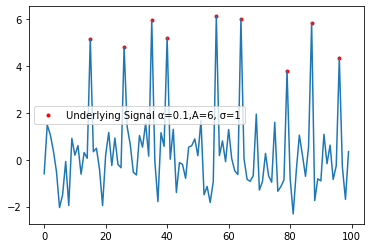

In [22]:
import numpy as np
import matplotlib.pyplot as plt
print("α=0.1,A=6, σ=1,noisetype='gaussian'")
waveform, event_locations = genwaveform(α=0.1,A=6, σ=1,noisetype='gaussian')
plt.plot(waveform)
plt.scatter(event_locations, waveform[event_locations], c='red', marker='.', label="Underlying Signal α=0.1,A=6, σ=1")
plt.legend()
plt.show()

α=0.1,A=1, σ=2,noisetype='uniform'


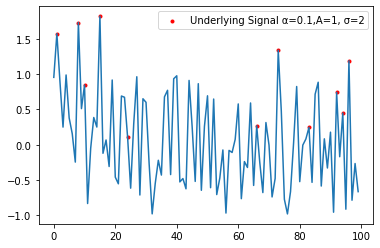

In [23]:
print("α=0.1,A=1, σ=2,noisetype='uniform'")
waveform, event_locations = genwaveform(α=0.1,A=1, σ=2,noisetype='uniform')
plt.plot(waveform)
plt.scatter(event_locations, waveform[event_locations], c='red', marker='.',label="Underlying Signal α=0.1,A=1, σ=2")
plt.legend()
plt.show()

α=0.1,A=0.1, σ=2,noisetype='uniform'


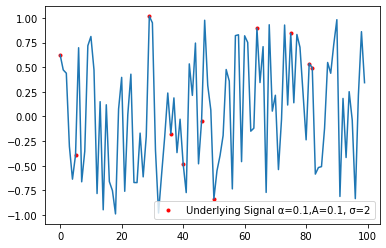

In [24]:
print("α=0.1,A=0.1, σ=2,noisetype='uniform'")
waveform, event_locations = genwaveform(α=0.1,A=0.1, σ=2,noisetype='uniform')
plt.plot(waveform)
plt.scatter(event_locations, waveform[event_locations], c='red', marker='.', label="Underlying Signal α=0.1,A=0.1, σ=2")
plt.legend()
plt.show()

## 2b

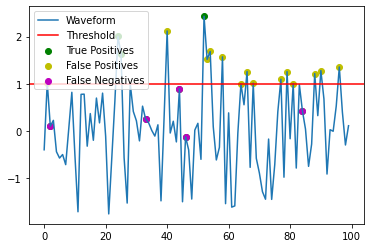

In [25]:
from collections import namedtuple

def detectioncounts(si, y, θ):
    tp = fn = fp = tn = 0
    for i, yi in enumerate(y):
        if i in si:
            if yi >= θ:
                tp += 1
            else:
                fn += 1
        else:
            if yi >= θ:
                fp += 1
            else:
                tn += 1
    DetectionCounts = namedtuple("DetectionCounts", ["tp", "fn", "fp", "tn"])
    return DetectionCounts(tp, fn, fp, tn)

import matplotlib.pyplot as plt

def plot_detection(y, si, θ, tp, fn, fp, tn):
    plt.plot(y, label='Waveform')
    plt.axhline(θ, color='r', label='Threshold')
    plt.scatter(si, [y[i] for i in si], c='g', label='True Positives')
    #plt.scatter([i for i in range(len(y)) if i not in si], [y[i] for i in range(len(y)) if i not in si], c='k', label='True Negatives')
    plt.scatter([i for i in range(len(y)) if i not in si and y[i] > θ], [y[i] for i in range(len(y)) if i not in si and y[i] > θ], c='y', label='False Positives')
    plt.scatter([i for i in si if y[i] <= θ], [y[i] for i in si if y[i] <= θ], c='m', label='False Negatives')
    plt.legend()
    plt.show()
    
N = 100
α = 0.1
A = 1
σ = 1

y, si = genwaveform(N=N, α=α, A=A, σ=σ, noisetype='gaussian')
θ = 1
tp, fn, fp, tn = detectioncounts(si, y, θ)

plot_detection(y, si, θ, tp, fn, fp, tn)

## Question 9:
Load the data "y50" and "i50" from the "A2a-testdata.h5" file.   Using a threshold of $1$, compute the detection counts using your function:
```
detectioncounts(i50, y50, 1)

In [36]:
import h5py

with h5py.File("A2a-testdata-one-based-index", 'r') as f:
    a_group_key = list(f.keys())[0]
    data = f[a_group_key]
    i50 = data.get('i50')
    y50 = data.get('y50')
    print(detectioncounts(i50, y50, θ=1).fp)  

9


## 2.c
$$p({\mathrm{false~positive}}|{\mathrm{signal~absent}})=\int_{\theta}^{\infty}p(\epsilon(t))\,d t=\left[1-\mathrm{cdf}(\theta;\epsilon(t))\right]$$

$$p({\mathrm{false~negative}}|{\mathrm{signal~present}})=\int_{-\infty}^{\theta}p(y(t))\,d t=\mathrm{cdf}(\theta;y(t))$$

In [26]:
import math
import numpy as np
def falsepos(y=1.0, σ=1.0, noisetype="gaussian"):
    return 1 - 0.5*(1+math.erf(y/np.sqrt(2)*σ))


def falseneg(y=1.0, A=1.0, σ=1.0, noisetype="gaussian"):
    return 0.5*(1+math.erf((y-A)/np.sqrt(2)*σ))


In [27]:
import numpy as np

def fp_estimate(N=100, α=1.0, σ=1.0):
    fp_rate = []
    for i in range(N):
        waveform, event_locations = genwaveform(N=100, A=A, σ=σ)
        tp, fn, fp, tn = detection_counts(si=event_locations, y=waveform, α=α)
        fp_rate.append(fp/(fp + tn))
    return np.mean(fp_rate)

def fn_estimate(N=100, α=1.0, A=1.0, σ=1.0):
    fn_rate = []
    for i in range(N):
        waveform, event_locations = genwaveform(N=100, A=A, σ=σ)
        tp, fn, fp, tn = detection_counts(si=event_locations, y=waveform, α=α)
        fn_rate.append(fn/(fn + tp))
    return np.mean(fn_rate)

def detection_counts(si=[], y=[], α=1.0):
    tp, fn, fp, tn = 0, 0, 0, 0
    for i in range(len(y)):
        signal = True if i in si else False
        detection = True if y[i] >= α else False

        if signal and detection:
            tp += 1
        elif signal and not detection:
            fn += 1
        elif not signal and detection:
            fp += 1
        else:
            tn += 1
    return tp, fn, fp, tn

print("Estimate False Positive Rate:", fp_estimate(N=1000, σ=2.0))
print("True False Positive Rate:", falsepos(σ=2.0))


Estimate False Positive Rate: 0.30625567433730777
True False Positive Rate: 0.022750131948179098


## 3a
In general, there is not an optimal value for the threshold because the trade-off between false positive and false negative rates depends on the specific requirements and constraints of the application. A threshold that minimizes the total error probability is not necessarily the same as the threshold that minimizes the total number of errors.

Minimizing the total error probability involves balancing false positive and false negative rates. A low threshold will result in a high false positive rate, but a low false negative rate. A high threshold will result in a low false positive rate, but a high false negative rate. The optimal threshold will depend on the relative cost or importance of false positives and false negatives in the specific application.

Minimizing the total number of errors involves simply counting the total number of false positives and false negatives and choosing the threshold that minimizes this sum. This approach may not consider the relative cost or importance of false positives and false negatives, and may result in a suboptimal solution in terms of total error probability.

## 3b

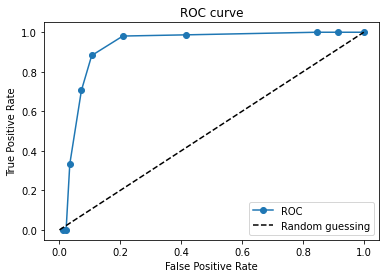

In [28]:
import matplotlib.pyplot as plt

def plotROC(thresholds, fp_rates, tp_rates, title='ROC curve'):
    fig, ax = plt.subplots()
    ax.plot(fp_rates, tp_rates, '-o', label='ROC')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.plot([0, 1], [0, 1], 'k--', label='Random guessing')
    ax.legend(loc='best')
    plt.show()

def example():
    N = 100
    A = 1
    α = 0.1
    σ = 1
    noise = 'gaussian'
    no_of_thresholds = 10
    y, si = genwaveform(N=N, α=α, A=A, σ=σ, noisetype=noise)
    thresholds = np.linspace(y.min(), y.max(), no_of_thresholds)
    fp_rates = []
    tp_rates = []
    for threshold in thresholds:
        fp, fn, tp, tn = detectioncounts(si, y, threshold)
        fp_rates.append(fp / (fp + tn))
        tp_rates.append(tp / (tp + fn))
    plotROC(thresholds, fp_rates, tp_rates)

example()

